# Breast Cancer Exercise with Scikit-Learn

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

breast_cancer_data = load_breast_cancer()

# print(breast_cancer_data.data[0])
# print(breast_cancer_data.feature_names)
print(breast_cancer_data.target)
print(breast_cancer_data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

`breast_cancer_data.target` gives you the labels of every data point. The very first data point in the set had a label of 0. By looking at the target_names, we know that 0 corresponds to malignant.

### Split the data into Test and Validation

Use the `train_test_split` function, it takes several parameters:

1. The data you want to split (for us `breast_cancer_data.data`)

2. The labels associated with that data (for us, `breast_cancer_data.target`).

3. The `test_size`. This is what percentage of your data you want to be in your testing set. Let's use test_size = 0.2

4. `random_state`. This will ensure that every time you run your code, the data is split in the same way. This can be any number. We used random_state = 100.

Note: The third and fourth parameters need the name of the parameter.

```py
train_test_split(____, _____, test_size = 0.2, random_state = 100)
```

`train_test_split` returns 4 values, in the following order:

1. The training set

2. The validation set

3. The training labels

4. The validation labels

In [2]:
# split the data into training and validation sets
training_data, validation_data, training_labels, validation_labels = train_test_split(
    breast_cancer_data.data, 
    breast_cancer_data.target, 
    test_size=0.2, 
    random_state=100
)
print(len(training_data), len(training_labels)) # should be same length, confirm split

455 455


## Create and train the classifier

In [3]:
classifier = KNeighborsClassifier(n_neighbors=3) # choosing k == 3
classifier.fit(training_data, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

## Test the classifiers accuracy

In [4]:
score = classifier.score(validation_data, validation_labels)
print(score) # accuracy with k == 3

0.9473684210526315


In [8]:
# determine the optimal value of k between 1 and 100
accuracies = []
for k in range(1,101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data, training_labels)
    accuracies.append(classifier.score(validation_data, validation_labels))
    
print(max(accuracies))

0.9649122807017544


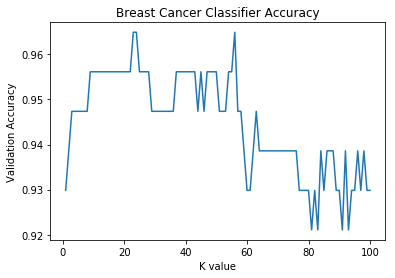

In [9]:
# plot the scores
k_list = [i for i in range(1,101)] # returns a list 0f 1 to 100
plt.plot(k_list, accuracies)
plt.title('Breast Cancer Classifier Accuracy')
plt.xlabel('K value')
plt.ylabel('Validation Accuracy')
plt.show()
